<a href="https://colab.research.google.com/github/JohanPP24/UAS-AI/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasifikasi Obesitas menggunakan KNN
Dibuat oleh :
*   Nama  : Johan Putra Pradana
*   NIM   : 312110314
*   Kelas : TI.21.B.SE2
*   Prodi : Teknik Infomatika





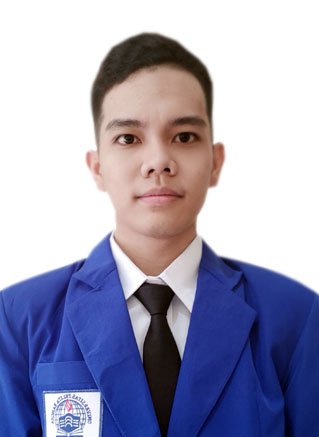



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
fdata="https://github.com/JohanPP24/UAS-AI/raw/9ade5ef90f2fa74e56cbede6e125f9d164a5845b/%E2%80%9Cdataset/Obesity%20Classification.csv"

df = pd.read_csv(fdata)
df.head()



,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
#Analisis jumlah data awal, deteksi duplikasi, dan hitung data setelah eliminasi duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Hapus duplikasi
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [6]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [7]:
from sklearn.model_selection import train_test_split

# Mengambil kolom 'Gender' sebagai target (Y) dan sisa kolom sebagai fitur (X)
Y = df['Gender']
X = df.drop("Gender", axis=1)

# Membagi data menjadi data latih (X_train, Y_train) dan data uji (X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=12)

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}")


Jumlah data train: 86
Jumlah data test: 22


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


In [ ]:

# Membuat objek StandardScaler
scl = StandardScaler()

# Menstandarisasi data pelatihan (fit dan transform)
X_train_scl = scl.fit_transform(X_train)

# Menstandarisasi data pengujian (transform berdasarkan data pelatihan)
X_test_scl = scl.transform(X_test)


# Membuat objek LabelEncoder
lbl_encoder = LabelEncoder()

# Mengubah label target untuk data latih
Y_train_enc = lbl_encoder.fit_transform(Y_train)

# Mengubah label target untuk data uji
Y_test_enc = lbl_encoder.transform(Y_test)


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Memuat dataset dari URL
fdata = "https://github.com/JohanPP24/UAS-AI/raw/9ade5ef90f2fa74e56cbede6e125f9d164a5845b/%E2%80%9Cdataset/Obesity%20Classification.csv"
df = pd.read_csv(fdata)

# Melihat beberapa baris pertama dataset
print(df.head())

# Memisahkan fitur (X) dan target (Y)
X = df.drop("Gender", axis=1)  # Misalnya "Gender" adalah kolom target
Y = df["Gender"]  # Target label

# Membagi data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=12)

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# Menggunakan LabelEncoder untuk kolom 'Gender' (kategori)
lbl_encoder = LabelEncoder()
Y_train_enc = lbl_encoder.fit_transform(Y_train)
Y_test_enc = lbl_encoder.transform(Y_test)

# Memisahkan kolom numerik dan kategorikal untuk standarisasi
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Membuat objek StandardScaler
scl = StandardScaler()

# Menstandarisasi data pelatihan (fit dan transform) hanya untuk data numerik
X_train_scl = scl.fit_transform(X_train_numeric)

# Menstandarisasi data pengujian (transform) hanya untuk data numerik
X_test_scl = scl.transform(X_test_numeric)

# Menampilkan hasil transformasi
print(f"Data Latih setelah standarisasi:\n{X_train_scl[:5]}")
print(f"Data Uji setelah standarisasi:\n{X_test_scl[:5]}")
print(f"Label Latih setelah encoding:\n{Y_train_enc[:5]}")
print(f"Label Uji setelah encoding:\n{Y_test_enc[:5]}")


   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese
Jumlah data latih: 86
Jumlah data uji: 22
Data Latih setelah standarisasi:
[[-1.37176353  0.16075968  1.17062223  1.36863803  1.3847924 ]
 [ 0.42558868 -1.07207253 -0.27014359 -1.00235505 -0.92429493]
 [ 1.11185044  0.16075968 -1.35071796 -0.66364175 -0.48569734]
 [ 0.91577565 -1.16013198 -0.27014359 -1.34106835 -1.56929139]
 [ 0.29487216  0.29284885 -1.35071796  0.18314149  0.28829842]]
Data Uji setelah standarisasi:
[[-1.50248005 -0.71983476  0.45023932  0.69121144  0.62369658]
 [-0.06459828  2.31821606  1.17062223  1.19928139  0.84299538]
 [-1.69855484  0.46896774  1.17062223  1.70735133  1.77179028]
 [ 1.01381305 -0.49968615  0.81043077 -0.66364175 -0.

In [24]:
X_train

,ID,Age,Height,Weight,BMI,Label
16,17,48,200,100,31.2,Obese
69,72,20,160,30,13.3,Underweight
90,93,48,130,40,16.7,Underweight
84,87,18,160,20,8.3,Underweight
65,68,51,130,65,22.7,Normal Weight
...,...,...,...,...,...,...
19,21,63,120,30,13.3,Underweight
64,67,46,200,85,26.1,Overweight
35,38,54,130,85,27.5,Overweight
99,102,42,200,30,13.3,Underweight


In [40]:
X_train_scl


array([[-1.37176353e+00,  1.60759683e-01,  1.17062223e+00,
         1.36863803e+00,  1.38479240e+00],
       [ 4.25588685e-01, -1.07207253e+00, -2.70143591e-01,
        -1.00235505e+00, -9.24294930e-01],
       [ 1.11185044e+00,  1.60759683e-01, -1.35071796e+00,
        -6.63641752e-01, -4.85697336e-01],
       [ 9.15775652e-01, -1.16013198e+00, -2.70143591e-01,
        -1.34106835e+00, -1.56929139e+00],
       [ 2.94872160e-01,  2.92848849e-01, -1.35071796e+00,
         1.83141492e-01,  2.88298419e-01],
       [ 7.85059128e-01, -8.95953646e-01,  4.50239319e-01,
        -4.94285103e-01, -2.27698751e-01],
       [ 1.27524610e+00, -9.84013090e-01,  4.50239319e-01,
        -1.34106835e+00, -1.56929139e+00],
       [ 5.56305210e-01, -1.91478093e-01, -9.90526501e-01,
        -3.24928454e-01, -5.99996709e-02],
       [ 6.21663472e-01,  2.48819127e-01, -1.35071796e+00,
         1.37848435e-02,  2.62498560e-01],
       [-1.63319658e+00,  9.09264957e-01,  1.53081368e+00,
         2.04606463e+00

In [41]:
Y_train


,Gender
16,Male
69,Female
90,Female
84,Female
65,Female
...,...
19,Female
64,Male
35,Female
99,Male


In [42]:
Y_train_enc

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])